In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [14]:
ds = pd.read_csv('url_features.csv')

In [15]:
print('The shape of our dataset is:', ds.shape)

The shape of our dataset is: (651191, 17)


In [16]:
ds.describe()

,Unnamed: 0,Unnamed: 0.1,url_length,Digits_to_char_ratio,Lcase_to_char_ratio,No_of_parameters,Url_entropy,Path_length,Host_length,No_of_fragments,No_of_Subdomains,sus_url,count-digits,count-letters
count,651191.000000,651191.000000,651191.000000,651191.000000,651191.000000,651191.000000,651191.000000,651191.000000,651191.000000,651191.000000,651191.000000,651191.000000,651191.000000,651191.000000
mean,325595.000000,325595.000000,60.156831,0.072662,0.747027,0.380497,-4.218435,41.153288,5.023088,0.000871,2.345403,0.066606,5.527409,45.247104
std,187982.793908,187982.793908,44.753902,0.101703,0.143224,1.224169,0.415609,29.770598,8.911953,0.032327,1.618860,0.249338,11.700814,31.624502
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-7.504113,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,162797.500000,162797.500000,32.000000,0.000000,0.696970,0.000000,-4.495558,21.000000,0.000000,0.000000,1.000000,0.000000,0.000000,25.000000
50%,325595.000000,325595.000000,47.000000,0.032258,0.777778,0.000000,-4.227567,35.000000,0.000000,0.000000,2.000000,0.000000,2.000000,37.000000
75%,488392.500000,488392.500000,77.000000,0.107143,0.843137,0.000000,-3.958591,53.000000,11.000000,0.000000,3.000000,0.000000,7.000000,58.000000
max,651190.000000,651190.000000,2175.000000,0.800000,0.984368,50.000000,0.000000,2175.000000,236.000000,6.000000,39.000000,1.000000,1204.000000,2141.000000


In [24]:
X = ds.iloc[:, 0:1].values 
y = ds.iloc[:, 1].values
print(X.shape)
print(y.shape)

(651191, 1)
(651191,)


In [19]:
#Splitting the Dataset into Training and Test Dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [20]:
#Import the Random Forest Regressor 
from sklearn.ensemble import RandomForestRegressor   
  
RFReg = RandomForestRegressor(n_estimators = 500, random_state = 0)
  
#Fitting the random forest regressor with training data represented by X_train and y_train
RFReg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=0)

In [21]:
y_predict_rfr = RFReg.predict((X_test))

#Model Evaluation using R-Square for Random Forest Regression
from sklearn import metrics
r_square = metrics.r2_score(y_test, y_predict_rfr)
print('R-Square Error associated with Random Forest Regression is:', r_square)

R-Square Error associated with Random Forest Regression is: 0.9999999999847377


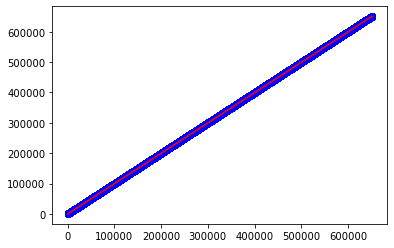

<Figure size 72x72 with 0 Axes>

In [22]:
X_val = np.arange(min(X_train), max(X_train), 0.01) 
X_val = X_val.reshape((len(X_val), 1))  
  
#Defining a scatter plot for training data 
plt.scatter(X_train, y_train, color = 'blue') 
  
#Plotting the predicted data 
plt.plot(X_val, RFReg.predict(X_val), color = 'red')  
  
#Set the size of the plot for better clarity
plt.figure(figsize=(1,1))
  
#Draw the plot 
plt.show() 